# Lab 4 - (Stochastic) Gradient Descent and Linear Regression
The goal of this lab is to deepen you understanding of gradient descent and linear regression.

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Task 1: Multiple Linear Regression to Predict House Price

In [76]:
# Load data for linear regression
housing = pd.read_csv('./lab 4 data/Housing.csv')
# Remove rows with empty fields
housing = housing.dropna()
print(housing.shape)

(545, 13)


In [77]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [78]:
# Convert String to numeric
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})
housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [79]:
# Function to create boolean mask for outliers
def get_outlier_mask(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data >= lower) & (data <= upper)

# Create boolean masks for each column
mask_price = get_outlier_mask(housing['price'])
mask_area = get_outlier_mask(housing['area'])
mask_bedrooms = get_outlier_mask(housing['bedrooms'])
mask_bathrooms = get_outlier_mask(housing['bathrooms'])
mask_stories = get_outlier_mask(housing['stories'])
mask_parking = get_outlier_mask(housing['parking'])

# Combine all masks (keep rows with NO outliers in ANY column)
final_mask = mask_price & mask_area & mask_bedrooms & mask_bathrooms & mask_stories & mask_parking

# Apply boolean mask to remove outliers
housing_cleaned = housing[final_mask]
housing_cleaned.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    housing_cleaned.drop(columns=['price']),
    housing_cleaned['price'],
    test_size=0.2,
    random_state=42
)

scalar_X = StandardScaler()
scalar_Y = StandardScaler()

X_train_scaled = scalar_X.fit_transform(X_train)
X_test_scaled = scalar_X.transform(X_test)

y_train_scaled = scalar_Y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scalar_Y.transform(y_test.values.reshape(-1, 1))

In [81]:
# sample code to fit a linear model using sklearn
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
print("Coefficients:", model.coef_)  # The weights for each feature
print("Intercept:", model.intercept_)  # The bias term

# sample code for prediction
y_pred_scaled = model.predict(X_test_scaled)

Coefficients: [[0.29628514 0.03118126 0.25489963 0.13633464 0.09456415 0.11242384
  0.09682258 0.12150992 0.23170637 0.12840737 0.14898054 0.11144184]]
Intercept: [-1.44955224e-16]


In [82]:
# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5112417608079491
R^2 Score: 0.6027730242561603


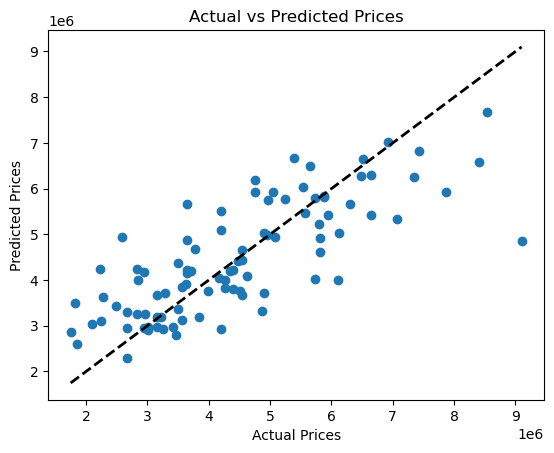

In [83]:
# Plotting actual vs predicted values
y_pred = scalar_Y.inverse_transform(y_pred_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
plt.show()

### Discuss the prediction quality
The model shows moderate prediction quality with an R² score of 0.60, meaning it explains 60% of the variance in house prices while 40% remains unexplained. This performance is reasonable for a linear regression model, suggesting the features capture the general pricing trends but miss some complexity. The MSE of 0.51 on scaled data translates to typical prediction errors in the hundreds of thousands of dollars when converted back to original prices. The 40% unexplained variance likely comes from non-linear relationships between features and price that a simple linear model cannot capture, as well as inherent market variability and factors not quantifiable in the dataset.


### Fitted Linear Model

The fitted linear regression model for predicting house prices is:

**Price = -0.00 + 0.296(area) + 0.031(bedrooms) + 0.255(bathrooms) + 0.136(stories) + 0.095(mainroad) + 0.112(guestroom) + 0.097(basement) + 0.122(hotwaterheating) + 0.232(airconditioning) + 0.128(parking) + 0.149(prefarea) + 0.111(furnishingstatus)**

### Interpretation:
- **Intercept ≈ 0**: The intercept is essentially zero due to standardization of features
- **Most influential features**:
  - **Area (0.296)**: Largest positive coefficient - larger homes command higher prices
  - **Bathrooms (0.255)**: Second most important - more bathrooms significantly increase value
  - **Air conditioning (0.232)**: Strong positive impact on price
  - **Prefarea (0.149)**: Being in a preferred area adds substantial value
  
- **Least influential features**:
  - **Bedrooms (0.031)**: Surprisingly low impact when controlling for other features
  - **Mainroad (0.095)**: Modest effect on pricing
  - **Basement (0.097)**: Minor positive contribution

All coefficients are positive, indicating that each feature contributes to increasing the house price. The standardized coefficients allow direct comparison of feature importance.

## Task 2: Locally Weighted Linear Regression 

In [89]:
tips = pd.read_csv('./lab 4 data/tips.csv')
X = tips[["total_bill", "size"]].to_numpy()
y = tips["tip"].to_numpy()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Bonus Task: GD and SGD

In [ ]:
# Load data for linear regression
data = pd.read_csv('penguins.csv')
# Remove rows with empty fields
data = data.dropna()
data.head()